In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from glob import glob
from scipy.interpolate import interp1d
from scipy.ndimage.filters import gaussian_filter1d
from joblib import Parallel, delayed

from matplotlib.font_manager import FontProperties

# from simulate_radiances_utils import *
%run simulate_radiances_utils.py
import urllib 

HAPI version: 1.1.0.9.7
To get the most up-to-date version please check http://hitran.org/hapi
ATTENTION: Python versions of partition sums from TIPS-2017 are now available in HAPI code

           It is free to use HAPI. If you use HAPI in your research or software development,
           please cite it using the following reference:
           R.V. Kochanov, I.E. Gordon, L.S. Rothman, P. Wcislo, C. Hill, J.S. Wilzewski,
           HITRAN Application Programming Interface (HAPI): A comprehensive approach
           to working with spectroscopic data, J. Quant. Spectrosc. Radiat. Transfer 177, 15-30 (2016)
           DOI: 10.1016/j.jqsrt.2016.03.005


In [3]:
all_times = pd.date_range(start = '2011-01-01 1:30:00',
                          end = '2016-01-01 1:30:00',
                          freq = '3H')

In [4]:
data_dir =  '/net/fluo/data2/groupMembers/cchristo/'
raw_aeri_data_dir = data_dir + 'aeri/aeri_noise_filtered/summit/'
# filename_format = ''

In [5]:
file_paths = sorted(os.listdir(raw_aeri_data_dir))

In [16]:
ds_i = xr.open_dataset(raw_aeri_data_dir + file_paths[300])
ds_i_time = ds_i.isel(time = 0)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [17]:
ds_i

<xarray.Dataset>
Dimensions:                                  (time: 3352, wnum: 2714, wnum2: 151)
Coordinates:
  * wnum                                     (wnum) float32 491.79016 ... 1799.8556
  * time                                     (time) datetime64[ns] 2011-04-17T00:03:42 ... 2011-04-17T23:56:32
  * wnum2                                    (wnum2) float32 800.0 ... 1400.0
Data variables:
    date                                     int32 ...
    base_time                                datetime64[ns] ...
    time_offset                              (time) datetime64[ns] ...
    missingDataFlag                          (time) float32 ...
    sceneMirPosEncoderMaxDrift               (time) float32 ...
    BBcavityFactor                           (time) float32 ...
    HBBtempOffset                            (time) float32 ...
    ABBtempOffset                            (time) float32 ...
    HBBbottomTempWeight                      (time) float32 ...
    HBBapexTempWeight                        (time) float32 ...
    HBBtopTempWeight                         (time) float32 ...
    ABBbottomTempWeight                      (time) float32 ...
    ABBapexTempWeight                        (time) float32 ...
    ABBtopTempWeight                         (time) float32 ...
    calibratedSceneID                        (time) float32 ...
    calibrationHBBtemp                       (time) float32 ...
    calibrationCBBtemp                       (time) float32 ...
    calibrationAmbientTemp                   (time) float32 ...
    channelNumber                            (time) float32 ...
    sceneMirPosEncoderDrift                  (time) float32 ...
    HBBmaxTempDiff                           (time) float32 ...
    ABBmaxTempDiff                           (time) float32 ...
    maxRoll                                  (time) float32 ...
    maxPitch                                 (time) float32 ...
    opticsCompartmentRelativeHumidity        (time) float32 ...
    sceneMirrorMotorStep                     (time) float32 ...
    sceneMirrorAngle                         (time) float32 ...
    maxSampleStdDev                          (time) float32 ...
    atmosphericPressure                      (time) float32 ...
    interferometerEnclosureRelativeHumidity  (time) float32 ...
    atmosphericRelativeHumidity              (time) float32 ...
    interferometerWindowTemp                 (time) float32 ...
    rainSensorIntensity                      (time) float32 ...
    detectorTemp                             (time) float32 ...
    coolerCurrent                            (time) float32 ...
    SCEtemp                                  (time) float32 ...
    motorDriverTemp                          (time) float32 ...
    computerTemp                             (time) float32 ...
    rackAmbientTemp                          (time) float32 ...
    coolerPowerSupplyTemp                    (time) float32 ...
    coolerExpanderTemp                       (time) float32 ...
    coolerCompressorTemp                     (time) float32 ...
    BBcontroller2temp                        (time) float32 ...
    BBcontroller1temp                        (time) float32 ...
    fixed12KohmResistor                      (time) float32 ...
    mirrorMotorTemp                          (time) float32 ...
    airNearBBsTemp                           (time) float32 ...
    BBsupportStructureTemp                   (time) float32 ...
    interferometerSecondPortTemp             (time) float32 ...
    airNearInterferometerTemp                (time) float32 ...
    outsideAirTemp                           (time) float32 ...
    fixed97KohmResistor                      (time) float32 ...
    fixed2500ohmResistor                     (time) float32 ...
    HBBbottomTemp                            (time) float32 ...
    HBBapexTemp                              (time) float32 ...
    HBBtopTemp                               (time) float32 ...
    ABBbottomTemp

In [38]:
# for var_name in ds_i.variables:
#     try:
#         print(var_name +  ' : ' + ds_i[var_name].attrs['longname'])
#     except: 
#         pass

In [187]:
# ds_i['sceneMirrorPosition']

<xarray.DataArray 'sceneMirrorPosition' (time: 3352)>
array([83., 84., 85., ..., 88., 89., 90.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2011-04-17T00:03:42 ... 2011-04-17T23:56:32
Attributes:
    longname:   Instrument scene mirror position identifier
    units:      count
    precision:  1E0

In [34]:
file_paths_sub = [raw_aeri_data_dir + fname for fname in file_paths if '201501' in fname]

# file_paths_sub = [raw_aeri_data_dir + fname for fname in file_paths]

In [8]:
# len(file_paths_sub)

In [10]:
ds_1 = xr.open_dataset(file_paths_sub[0])
ds_2 = xr.open_dataset(file_paths_sub[0])
# ds_i_time = ds_i.isel(time = 0)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [19]:
def preprocess_spectra_ds(ds):
    try:
#         time_offset = ds['time_offset']
        time_offset = ds['Time_UTC_hours']
        ds_subset = ds['mean_rad'].to_dataset()
        ds_subset = ds_subset.assign_coords({'time':time_offset})
    except: 
        print('Failed')
    return ds_subset

In [35]:
# %%capture
ds_i = xr.open_mfdataset(file_paths_sub, 
                         combine = 'by_coords',
                         concat_dim = 'time', 
                         preprocess=preprocess_spectra_ds)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cond

In [119]:
%%capture
rad_threshold_800 = 29.0

failed_times = []
failed_reason = []

rad_values_800 = np.zeros(all_times.shape)
cloud_free_bool = np.zeros(all_times.shape)

for time_ii in range(len(all_times)):
# for time_ii in range(9000, 9001):
    try:
        
        time_i = all_times[time_ii]
        print(time_i)
    #     search_str = str(time_i.year) + str(time_i.month) + str(time_i.day)
        search_str = '{year}{month:02d}{day:02d}'.format(year = time_i.year,
                                                        month = time_i.month,
                                                        day = time_i.day)
        file_path_to_open = [raw_aeri_data_dir + fname for fname in file_paths if \
                             (search_str in fname) & ('ch2' not in fname)]
        file_path_to_open = file_path_to_open[0]

        ds_i = preprocess_spectra_ds(xr.open_dataset(file_path_to_open))
    #     ds_i = xr.open_dataset(file_path_to_open)

        # find index of closest spectum
        time_argmin = np.argmin(abs(np.datetime64(time_i) - ds_i['time']))

        ds_i_closest = ds_i.isel(time = time_argmin)

        # set missing values (-9999) to nan
        ds_i_closest = ds_i_closest.where(ds_i_closest >= 0, np.nan)

        # compute mean radiance in 800cm band
        mean_rad_800 = compute_mean_rad_800_band(ds_i_closest['mean_rad'].values,
                              nu = ds_i_closest['wnum'].values)
        rad_values_800[time_ii] = mean_rad_800
        if mean_rad_800 <= rad_threshold_800:
            cloud_free_bool[time_ii] = True
        else: 
            cloud_free_bool[time_ii] = False
    except Exception as e:
        print('Failed on ', time_i)
        failed_times.append(time_i)
        failed_reason.append(str(e))

In [143]:
# failed_reason

In [81]:
np.datetime64(time_i) - ds_i['time']

<xarray.DataArray 'time' (time: 3352)>
array(['2014-01-30T01:30:00.000000000', '2014-01-30T01:29:59.999999000',
       '2014-01-30T01:29:59.999998000', ...,
       '2014-01-30T01:29:59.996651000', '2014-01-30T01:29:59.996650000',
       '2014-01-30T01:29:59.996649000'], dtype='datetime64[ns]')
Dimensions without coordinates: time

In [82]:
np.datetime64(time_i)

numpy.datetime64('2014-01-30T01:30:00.000000')

In [84]:
ds_i

<xarray.Dataset>
Dimensions:   (time: 3352, wnum: 2714)
Coordinates:
  * wnum      (wnum) float64 491.8 492.3 492.8 ... 1.799e+03 1.799e+03 1.8e+03
Dimensions without coordinates: time
Data variables:
    mean_rad  (time, wnum) float64 ...

In [85]:
rr = xr.open_dataset(file_path_to_open)

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


In [93]:
# rr
# rr['Time_UTC_hours']

In [88]:
time_i

Timestamp('2014-01-30 01:30:00', freq='3H')

In [71]:
# search_str
all_times[9000]

Timestamp('2014-01-30 01:30:00', freq='3H')

(array([733773., 734138., 734503., 734869., 735234., 735599., 735964.]),
 <a list of 7 Text major ticklabel objects>)

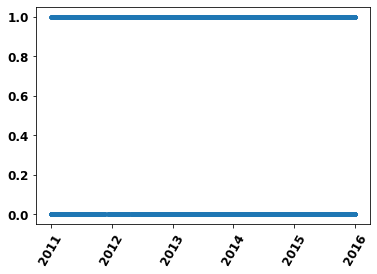

In [120]:
# plt.plot(cloud_free_bool)
plt.plot(all_times, cloud_free_bool, '.')
plt.xticks(rotation = 60)

In [146]:
# rad_values_800[63]
np.count_nonzero(cloud_free_bool)/len(cloud_free_bool)

0.6083236361147238

(array([734201., 734205., 734209., 734213., 734217., 734221., 734225.,
        734228., 734232.]),
 <a list of 9 Text major ticklabel objects>)

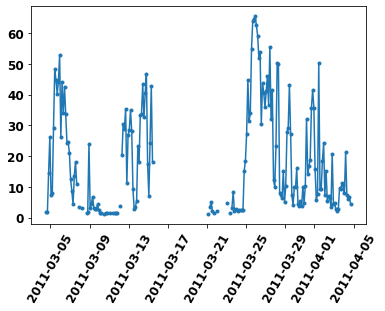

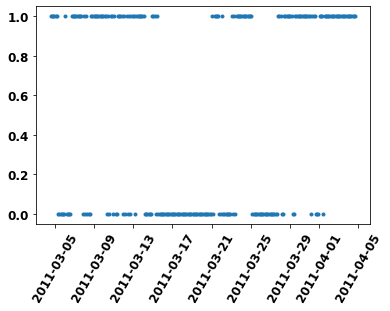

In [145]:
ind_min = 500
ind_max = 750
plt.plot(all_times[ind_min:ind_max], rad_values_800[ind_min:ind_max], '.-')
plt.xticks(rotation = 60)

plt.figure()
plt.plot(all_times[ind_min:ind_max], cloud_free_bool[ind_min:ind_max], '.')
plt.xticks(rotation = 60)
# plt.xlim([2011, 2012])

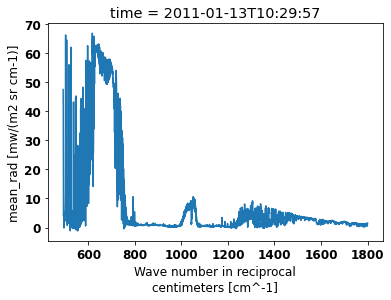

In [278]:
ds_i_closest['mean_rad'].plot()

## save results

In [158]:
ds_out = xr.Dataset()
ds_out['cloud_free_bool'] = xr.DataArray(data = cloud_free_bool,  
                                         dims = ('time',),
                                         coords = {'time': all_times})

ds_out['800_cm_mean_rad'] = xr.DataArray(data = rad_values_800,  
                                         dims = ('time',),
                                         coords = {'time': all_times})

In [163]:
# cloud_free_bool.shape
# ds_out.to_netcdf('/net/fluo/data2/groupMembers/cchristo/misc_data/cloud_bool_rad_29.nc')

In [165]:
# ds_out

## Look at a single day

In [36]:
ds_i_nan = ds_i.where(ds_i > 0, np.nan)
ds_i_time_max = ds_i_nan.max('time')
ds_i_time_min = ds_i_nan.min('time')
ds_i_time_median = ds_i_nan.median('time')

/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
/home/cchristo/anaconda3/envs/rad_transfer/lib/python3.6/site-packages/xarray/coding/variables.py:141: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


18.855218142068875


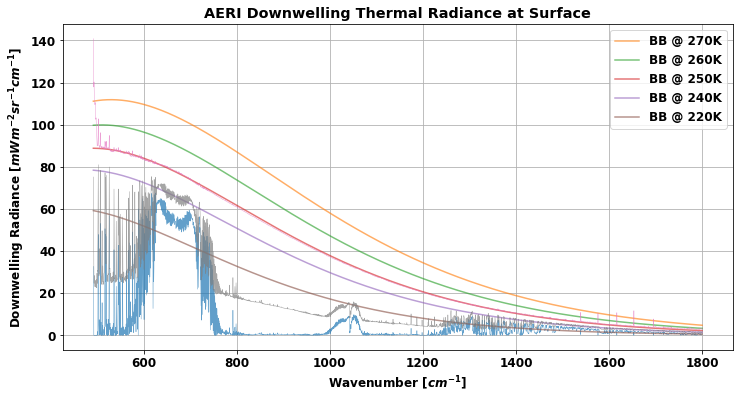

In [43]:
plt.figure( figsize = (12,6))
# ds_i
k_grid = ds_i_time['wnum'].values
rad = ds_i_time_min['mean_rad'].values
ds_i.isel(time = 0)
plt.plot(k_grid, rad, linewidth = 0.5, alpha=0.7)



wavenum_m = k_grid*1e2
W_m_mW_cm = 1e2*1e3
plt.plot(k_grid, W_m_mW_cm*planck_wavenumber(wavenum_m,270),label='BB @ 270K',alpha=0.63)
plt.plot(k_grid, W_m_mW_cm*planck_wavenumber(wavenum_m,260),label='BB @ 260K',alpha=0.63)
plt.plot(k_grid, W_m_mW_cm*planck_wavenumber(wavenum_m,250),label='BB @ 250K',alpha=0.63)
plt.plot(k_grid, W_m_mW_cm*planck_wavenumber(wavenum_m,240),label='BB @ 240K',alpha=0.63)
plt.plot(k_grid, W_m_mW_cm*planck_wavenumber(wavenum_m,220),label='BB @ 220K',alpha=0.63)
plt.legend(loc=0)

k_grid = ds_i_time['wnum'].values
rad = ds_i_time_max['mean_rad'].values
plt.plot(k_grid, rad, linewidth = 0.5,alpha=0.7)



k_grid = ds_i_time['wnum'].values
rad = ds_i_time_median['mean_rad'].values
plt.plot(k_grid, rad, linewidth = 0.5,alpha=0.7)


print(compute_mean_rad_800_band(rad,
                          nu = k_grid))

# plt.xlim((491,1799))
# plt.xlim((500, 1800))
# plt.xlim([790, 810])

plt.grid()
plt.xlabel('Wavenumber [$cm^{-1}$]', weight = 'bold')
plt.ylabel(r'Downwelling Radiance [$mW m^{-2} sr^{-1} cm^{-1}$]', weight = 'bold')
plt.title('AERI Downwelling Thermal Radiance at Surface', weight = 'bold')
plt.savefig('/home/cchristo/proj_christian/final_results/figs/AERI_radiance_surface.png', dpi = 200)

In [226]:
compute_mean_rad_800_band(W_m_mW_cm*planck_wavenumber(wavenum_m,215),
                          nu = k_grid)

29.000542

In [228]:
# np.diff(k_grid)
compute_mean_rad_800_band(W_m_mW_cm*planck_wavenumber(wavenum_m,225),
                          nu = k_grid)

36.835754

In [140]:
standard_dev_rad = ds_i_time['standard_dev_mean_rad'].values
k_grid2 = ds_i_time['wnum2'].values

KeyError: 'standard_dev_mean_rad'

Text(0, 0.5, 'Radiance STD')

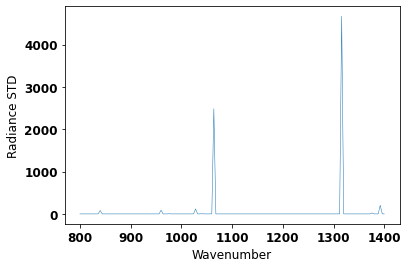

In [25]:
plt.plot(k_grid2, standard_dev_rad, linewidth = 0.5)

plt.xlabel('Wavenumber')
plt.ylabel('Radiance STD')